 # Spring N°1. Ejercicios with MySQL (Practica conectando con la base de dato desde Jupyter Notebook.

## Conectar la base de dato a python

In [3]:
import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password=""
)

print(mydb)

**Muestra las tablas creadas en la base de dato**

In [5]:
import mysql.connector

mydb=mysql.connector.connect(host="localhost", 
                                  user="root", 
                                  passwd="", 
                                  database="movies")
mycursor=mydb.cursor()
mycursor.execute("show tables")
for tabla in mycursor:
    print(tabla)

('tb_genre',)
('tb_movie',)
('tb_movie_person',)
('tb_person',)
('tb_role',)


## Ejercicio 1
A partir de los documentos adjuntos (estructura y datos), crea una base de datos con MySQL. Muestra las principales características del esquema creado y explica las diferentes tablas y variables existentes.

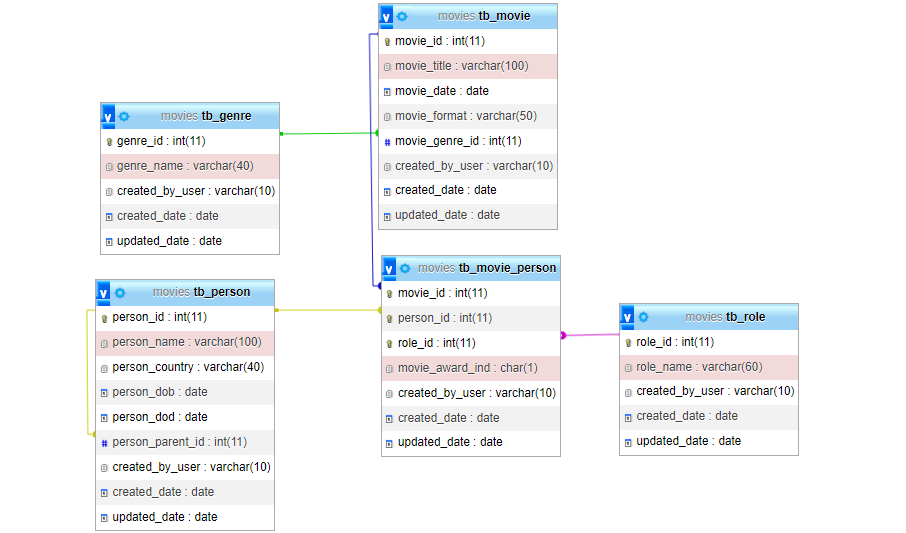

Las tablas de esta base de datos están relacionadas entre sí. La tabla tb_movie conecta con las tablas tb_genre y tb_movie_person, y la tabla tb_movie_person relaciona con las tablas tb_person y tb_role, permitiendo realizar busquedas relacionadas entre ellas. Con respecto a las variables se utilizaron tipo numericas como la variable tipo Integer, para las variables donde es necesario colocar Id, adicionalmente, se utilizaron tipo texto, como Varchar y las tipos fechas, como date.

## Ejercicio 2

Realiza la siguiente consulta sobre la recién creada base de datos:

Tienes que obtener el nombre, el país y la fecha de nacimiento de aquellas personas por las que no conste una fecha de muerte y ordenar los datos de la persona más vieja a la persona más joven.

In [14]:
mycursor.execute("SELECT person_name, person_country, person_dob FROM tb_person WHERE person_dod IS NULL ORDER BY person_dob ASC")

myresult = mycursor.fetchall()

for x in myresult:
  print(x)

('John Williams', 'United States', datetime.date(1928, 8, 8))
('Vera Miles', 'United States', datetime.date(1929, 8, 23))
('Sean Connery', 'Scotland', datetime.date(1930, 7, 8))
('Robert Duvall', 'United States', datetime.date(1931, 1, 5))
('Morgan Freeman', 'United States', datetime.date(1935, 10, 1))
('Francis Ford Coppola', 'United States', datetime.date(1939, 4, 7))
('Gary Kurtz', 'United States', datetime.date(1940, 7, 27))
('Martin Sheen', 'United States', datetime.date(1940, 8, 3))
('Harrison Ford', 'United States', datetime.date(1942, 7, 13))
('George Lucas', 'United States', datetime.date(1944, 5, 14))
('Carmine Coppola', 'United States', datetime.date(1945, 7, 8))
('Steven Spielberg', 'United States', datetime.date(1946, 12, 18))
('Tim Robbins', 'United States', datetime.date(1949, 6, 7))
('Mel Gibson', 'Australia', datetime.date(1950, 8, 9))
('Tom Hanks', 'United States', datetime.date(1956, 7, 9))
('Emilio Martinez Lazaro', 'Spain', datetime.date(1956, 9, 9))
('Karra Elejal

## Ejercicio 3

Realiza la siguiente consulta sobre la recién creada base de datos:

Tienes que obtener el nombre del género y el número total de películas de ese género y ordenarlo por orden descendente de número total de películas.

In [15]:
mycursor.execute("SELECT tb_genre.genre_name, COUNT(tb_movie.movie_genre_id) AS total_movies FROM tb_movie RIGHT JOIN tb_genre ON tb_movie.movie_genre_id=tb_genre.genre_id GROUP BY genre_name ORDER BY total_movies DESC")

myresult = mycursor.fetchall()

for x in myresult:
  print(x)

('Comedia', 3)
('Ciencia Ficción', 2)
('Romance', 2)
('Acción', 2)
('Drama', 2)
('Suspense', 2)
('Fantasía', 1)
('Bélico', 1)
('Terror', 1)
('Musical', 0)
('Melodrama', 0)


## Ejercicio 4

Realiza la siguiente consulta sobre la recién creada base de datos:

Tienes que obtener, para cada persona, su nombre y el número máximo de roles distintos que ha tenido en una misma película.

In [16]:
mycursor.execute("SELECT tb_person.person_name, tb_movie.movie_title, COUNT(tb_movie_person.role_id) as max_roles FROM tb_movie_person JOIN tb_person ON tb_movie_person.person_id=tb_person.person_id JOIN tb_movie ON tb_movie_person.movie_id=tb_movie.movie_id GROUP by tb_person.person_name, tb_movie.movie_id ORDER BY max_roles DESC")

myresult = mycursor.fetchall()

for x in myresult:
  print(x)

('Francis Ford Coppola', 'Apocalypse Now', 3)
('Alfred Joseph Hitchcock', 'Psycho', 3)
('Steven Spielberg', 'The Terminal', 2)
('Daniel Sanchez Arevalo', 'La Gran Familia Española', 2)
('George Lucas', 'Indiana Jones and the Temple of Doom', 2)
('Mel Gibson', 'Braveheart', 2)
('Robert Alamo', 'La Gran Familia Española', 1)
('Robert Duvall', 'Apocalypse Now', 1)
('Karra Elejalde', 'Ocho Apellidos Vascos', 1)
('Steven Spielberg', 'Jaws', 1)
('Morgan Freeman', 'The Shawshank Redemption', 1)
('George Lucas', 'Star Wars:Episode IV - A New Hope', 1)
('Karra Elejalde', 'Ocho Apellidos Catalanes', 1)
('Emilio Martinez Lazaro', 'Ocho Apellidos Vascos', 1)
('John Williams', 'Indiana Jones and the Temple of Doom', 1)
('Hector Colome', 'La Gran Familia Española', 1)
('Martin Sheen', 'Apocalypse Now', 1)
('Emilio Martinez Lazaro', 'Ocho Apellidos Catalanes', 1)
('Steven Spielberg', 'ET The Extraterrestrial', 1)
('Tim Robbins', 'The Shawshank Redemption', 1)
('Gary Kurtz', 'Star Wars:Episode IV - A 

**Posteriormente, muestra únicamente a aquellas personas que hayan asumido más de un rol en una misma película.**

In [17]:
mycursor.execute("SELECT tb_person.person_name, tb_movie.movie_title, COUNT(tb_movie_person.role_id) as max_roles FROM tb_movie_person JOIN tb_person ON tb_movie_person.person_id=tb_person.person_id JOIN tb_movie ON tb_movie_person.movie_id=tb_movie.movie_id GROUP by tb_person.person_name, tb_movie.movie_id HAVING max_roles >1 ORDER BY max_roles DESC")

myresult = mycursor.fetchall()

for x in myresult:
  print(x)

('Francis Ford Coppola', 'Apocalypse Now', 3)
('Alfred Joseph Hitchcock', 'Psycho', 3)
('Steven Spielberg', 'The Terminal', 2)
('Daniel Sanchez Arevalo', 'La Gran Familia Española', 2)
('George Lucas', 'Indiana Jones and the Temple of Doom', 2)
('Mel Gibson', 'Braveheart', 2)


## Ejercicio 5

Realiza la siguiente operación sobre la base de datos recién creada:

Debes crear un nuevo género llamado "Documental" que tenga como identificador el número 69.

In [26]:
sql = "INSERT INTO movies.tb_genre (genre_id, genre_name)  VALUES (%s, %s)"
val = (69, 'Documental')
mycursor.execute(sql, val)

mydb.commit()

print(mycursor.rowcount, "record inserted.")

1 record inserted.


In [28]:
mycursor.execute("SELECT genre_id, genre_name FROM tb_genre")

myresult = mycursor.fetchall()

for x in myresult:
  print(x)

(1, 'Acción')
(2, 'Ciencia Ficción')
(3, 'Comedia')
(4, 'Drama')
(5, 'Fantasía')
(6, 'Melodrama')
(7, 'Musical')
(8, 'Romance')
(9, 'Suspense')
(10, 'Terror')
(11, 'Bélico')
(69, 'Documental')


**Para los ejercicios 6 y 7, realice cambio en la base de dato en las propiedades de las llaves foraneas, las tenia restringida y las cambie a cascada, para que me permitiera borrar y/o actualizar los datos.**

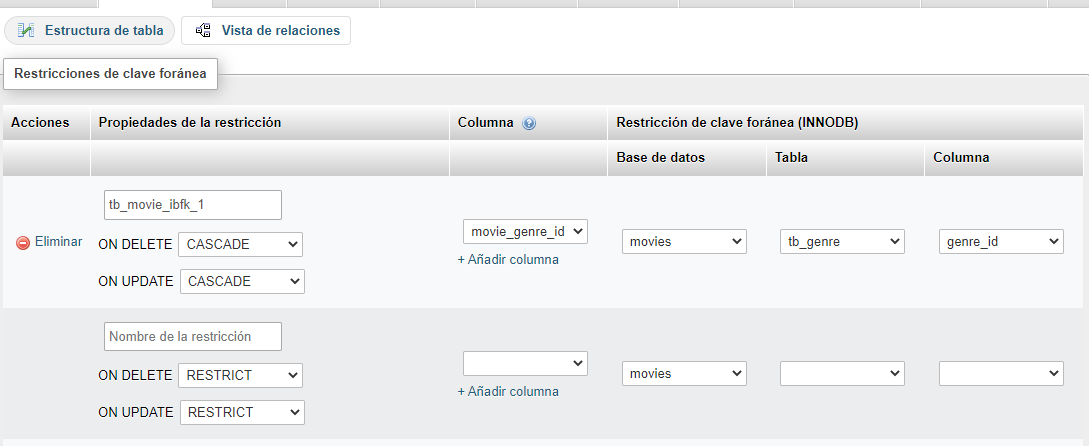

## Ejercicio 6

Realiza la siguiente operación sobre la base de datos recién creada:

Elimina la película "La Gran Familia Española" de la base de datos.

In [22]:
sql = "DELETE FROM tb_movie WHERE movie_title='La Gran Familia Española'"

mycursor.execute(sql)

mydb.commit()

print(mycursor.rowcount, "record(s) deleted")

1 record(s) deleted


In [23]:
mycursor.execute("SELECT * FROM tb_movie")

myresult = mycursor.fetchall()

for x in myresult:
  print(x)

(1, 'Apocalypse Now', datetime.date(1979, 5, 10), 'Film', 11, 'OS_SGAD', None, None)
(2, 'Star Wars:Episode IV - A New Hope', datetime.date(1977, 5, 25), 'Film', 2, 'OS_SGAD', None, None)
(3, 'Indiana Jones and the Temple of Doom', datetime.date(1984, 5, 8), 'Film', 1, 'OS_SGAD', None, None)
(4, 'The Terminal', datetime.date(2004, 6, 18), 'Digital', 3, 'OS_SGAD', None, None)
(5, 'Jaws', datetime.date(1975, 1, 1), 'Film', 10, 'OS_SGAD', None, None)
(6, 'ET The Extraterrestrial', datetime.date(1982, 7, 25), 'Film', 5, 'OS_SGAD', None, None)
(7, 'Psycho', datetime.date(1960, 5, 6), 'Film', 9, 'OS_SGAD', None, None)
(8, 'Ocho Apellidos Vascos', datetime.date(2014, 3, 14), 'Digital', 3, 'OS_SGAD', None, None)
(9, 'Ocho Apellidos Catalanes', datetime.date(2016, 6, 9), 'Digital', 8, 'OS_SGAD', None, None)
(10, 'El otro lado de la cama', datetime.date(2002, 9, 4), 'Digital', 8, 'OS_SGAD', None, None)
(12, 'El dia de la bestia', datetime.date(1994, 12, 25), 'Film', 1, 'OS_SGAD', None, None)
(13

## Ejercicio 7

Realiza la siguiente operación sobre la base de datos recién creada:

Cambia el género de la película "Ocho apellidos catalanes" para que conste como comedia y no como romántica.

In [24]:
sql = "UPDATE tb_movie SET movie_genre_id=3 WHERE movie_title='Ocho Apellidos Catalanes'"

mycursor.execute(sql)

mydb.commit()

print(mycursor.rowcount, "record(s) affected")

1 record(s) affected


In [25]:
mycursor.execute("SELECT * FROM tb_movie")

myresult = mycursor.fetchall()

for x in myresult:
  print(x)

(1, 'Apocalypse Now', datetime.date(1979, 5, 10), 'Film', 11, 'OS_SGAD', None, None)
(2, 'Star Wars:Episode IV - A New Hope', datetime.date(1977, 5, 25), 'Film', 2, 'OS_SGAD', None, None)
(3, 'Indiana Jones and the Temple of Doom', datetime.date(1984, 5, 8), 'Film', 1, 'OS_SGAD', None, None)
(4, 'The Terminal', datetime.date(2004, 6, 18), 'Digital', 3, 'OS_SGAD', None, None)
(5, 'Jaws', datetime.date(1975, 1, 1), 'Film', 10, 'OS_SGAD', None, None)
(6, 'ET The Extraterrestrial', datetime.date(1982, 7, 25), 'Film', 5, 'OS_SGAD', None, None)
(7, 'Psycho', datetime.date(1960, 5, 6), 'Film', 9, 'OS_SGAD', None, None)
(8, 'Ocho Apellidos Vascos', datetime.date(2014, 3, 14), 'Digital', 3, 'OS_SGAD', None, None)
(9, 'Ocho Apellidos Catalanes', datetime.date(2016, 6, 9), 'Digital', 3, 'OS_SGAD', None, None)
(10, 'El otro lado de la cama', datetime.date(2002, 9, 4), 'Digital', 8, 'OS_SGAD', None, None)
(12, 'El dia de la bestia', datetime.date(1994, 12, 25), 'Film', 1, 'OS_SGAD', None, None)
(13